In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Bank.csv')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [8]:
df.shape

(11162, 17)

In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [10]:
df['deposit'].value_counts() #Target variable

deposit
no     5873
yes    5289
Name: count, dtype: int64

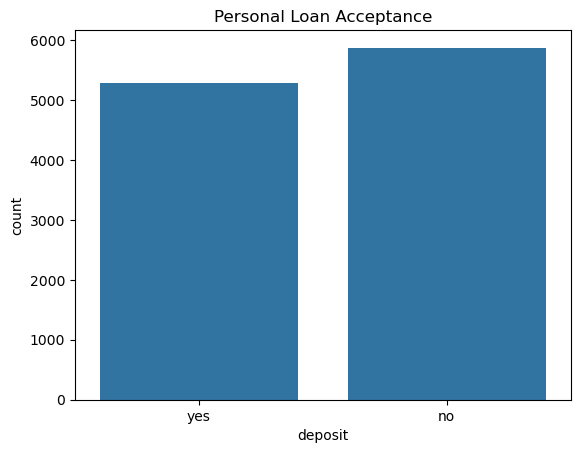

In [11]:
sns.countplot(x='deposit', data=df)
plt.title("Personal Loan Acceptance")
plt.show()

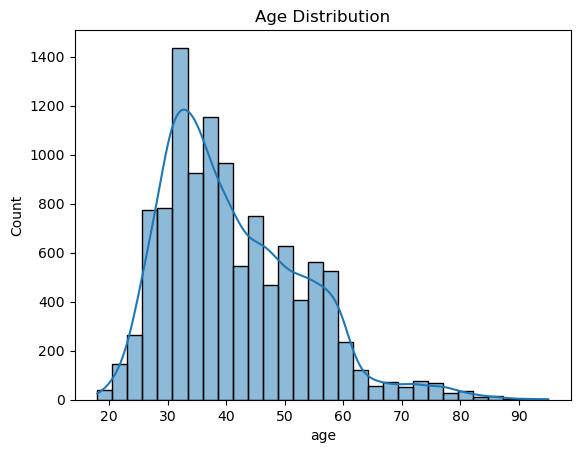

In [12]:
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

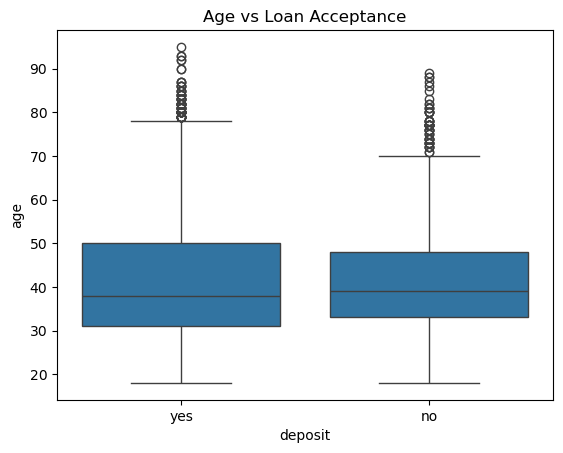

In [13]:
sns.boxplot(x='deposit', y='age', data=df)
plt.title("Age vs Loan Acceptance")
plt.show()

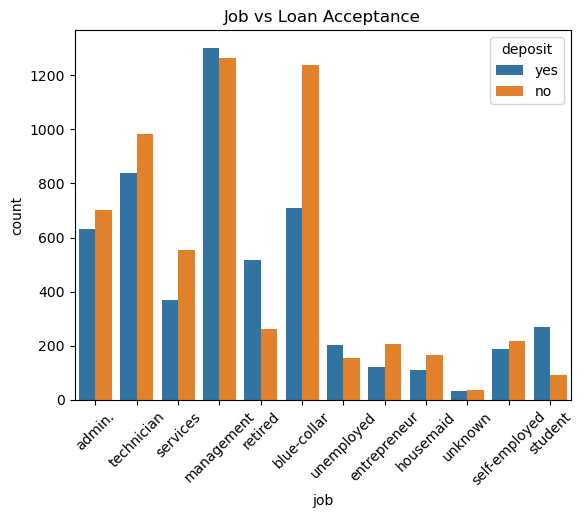

In [14]:
sns.countplot(x='job', hue='deposit', data=df)
plt.xticks(rotation=45)
plt.title("Job vs Loan Acceptance")
plt.show()

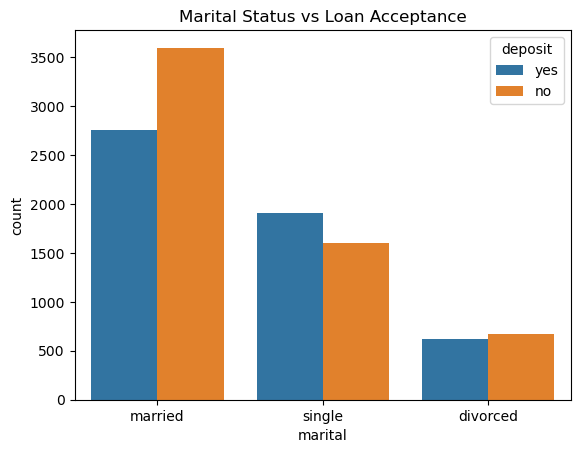

In [15]:
sns.countplot(x='marital', hue='deposit', data=df)
plt.title("Marital Status vs Loan Acceptance")
plt.show()

In [16]:
#Data Preprocessing

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

In [22]:
X = df.drop('deposit', axis=1) #Delete the target variable from x(input) and then train the input
y = df['deposit']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #20% testing and 80% data training

In [26]:
from sklearn.linear_model import LogisticRegression


In [27]:
log_model = LogisticRegression(max_iter=1000)

In [29]:
log_model.fit(X_train, y_train)

C:\Users\abeer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [30]:
y_pred_log = log_model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y_test, y_pred_log)
print('Classification Report of Logistic Regression')
print(classification_report(y_test, y_pred_log))

Classification Report of Logistic Regression
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1166
           1       0.78      0.77      0.77      1067

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233



In [38]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [39]:
accuracy_score(y_test, y_pred_dt)
print('Classification Report of Decision Tree')
print(classification_report(y_test, y_pred_dt))

Classification Report of Decision Tree
              precision    recall  f1-score   support

           0       0.86      0.74      0.80      1166
           1       0.76      0.87      0.81      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.80      2233

